In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
sns.set(rc={"figure.figsize":(15, 12)})

url_train = 'https://raw.githubusercontent.com/ghinakh/dataset/main/salju_train.csv'
url_test = 'https://raw.githubusercontent.com/ghinakh/dataset/main/salju_test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [ ]:
del df_train['id']
df_train['Tanggal']= pd.to_datetime(df_train['Tanggal'])
df_test['Tanggal']= pd.to_datetime(df_test['Tanggal'])

In [ ]:
display(df_train.head(2))
display(df_test.head(2))

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,2014-01-06,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2014-07-15,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya


,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,2010-04-11,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,2015-03-26,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes


In [ ]:
print('TRAINING :',df_train.shape)
print('TESTING :',df_test.shape)

TRAINING : (109095, 23)
TESTING : (18182, 23)


In [ ]:
print("TRAIN DATAFRAME")
df_train.info()
print("\nTEST DATAFRAME")
df_test.info()

TRAIN DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Tanggal                   109095 non-null  datetime64[ns]
 1   KodeLokasi                109095 non-null  object        
 2   SuhuMin                   107973 non-null  float64       
 3   SuhuMax                   108166 non-null  float64       
 4   Hujan                     106664 non-null  float64       
 5   Penguapan                 62071 non-null   float64       
 6   SinarMatahari             56716 non-null   float64       
 7   ArahAnginTerkencang       101351 non-null  object        
 8   KecepatanAnginTerkencang  101399 non-null  float64       
 9   ArahAngin9am              101172 non-null  object        
 10  ArahAngin3pm              105898 non-null  object        
 11  KecepatanAngin9am         107742 non-null  float6

In [ ]:
display("TRAIN DATAFRAME",df_train.describe())
display("TEST DATAFRAME",df_test.describe())

'TRAIN DATAFRAME'

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101399.000000,107742.000000,106792.000000,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000
mean,12.196183,23.214819,2.385005,5.462440,7.599527,40.032002,14.052115,18.677579,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771
std,6.389419,7.106596,8.588155,4.201638,3.789042,13.617554,8.926092,8.830199,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,47.300000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


'TEST DATAFRAME'

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,18017.000000,18017.000000,17795.000000,10326.000000,9464.000000,16908.000000,17984.000000,17828.000000,17852.000000,17634.000000,16317.00000,16329.000000,11140.000000,10726.000000,17963.000000,17740.000000
mean,12.233158,23.295604,2.333560,5.509646,7.630135,39.974095,13.971864,18.585540,68.791676,51.438811,1017.56166,1015.181064,4.449820,4.498322,17.048945,21.774408
std,6.433053,7.156981,8.320407,4.159158,3.796355,13.491682,8.828422,8.748586,19.158606,20.799233,7.14728,7.072656,2.890697,2.725233,6.524556,6.978095
min,-7.600000,-2.500000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,2.000000,1.000000,982.30000,984.500000,0.000000,0.000000,-5.200000,-3.700000
25%,7.700000,18.000000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.800000,21.200000
75%,16.900000,28.300000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.30000,1019.900000,7.000000,7.000000,21.600000,26.600000
max,31.400000,48.100000,247.200000,68.800000,14.500000,122.000000,83.000000,83.000000,100.000000,100.000000,1040.60000,1038.400000,8.000000,8.000000,37.700000,46.100000


### Checking missing values 

In [ ]:
def null_table(df_train, df_test):
    print("Train Data Frame")
    print(pd.isnull(df_train).sum())
    print(" -------------------------------- ")
    print("Test Data Frame")
    print(pd.isnull(df_test).sum())

null_table(df_train, df_test)

Train Data Frame
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64
 -------------------------------- 
Test Data Frame
Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan

### Handle Missing Value

In [ ]:
df_train.dropna(subset=['BersaljuBesok'], inplace=True)
df_test.dropna(subset=['BersaljuBesok'], inplace=True)
df_train.dropna(subset=['BersaljuHariIni'], inplace=True)
df_test.dropna(subset=['BersaljuHariIni'], inplace=True)
df_train.dropna(subset=['SuhuMax'], inplace=True)
df_test.dropna(subset=['SuhuMax'], inplace=True)
df_train.dropna(subset=['SuhuMin'], inplace=True)
df_test.dropna(subset=['SuhuMin'], inplace=True)

In [ ]:
print(df_train.shape, df_test.shape)
null_table(df_train, df_test)

(105094, 23) (17529, 23)
Train Data Frame
Tanggal                         0
KodeLokasi                      0
SuhuMin                         0
SuhuMax                         0
Hujan                           0
Penguapan                   44294
SinarMatahari               49652
ArahAnginTerkencang          6459
KecepatanAnginTerkencang     6417
ArahAngin9am                 6977
ArahAngin3pm                 2527
KecepatanAngin9am             634
KecepatanAngin3pm            1682
Kelembaban9am                 951
Kelembaban3pm                2383
Tekanan9am                   9999
Tekanan3pm                  10037
Awan9am                     39168
Awan3pm                     41721
Suhu9am                       313
Suhu3pm                      1730
BersaljuHariIni                 0
BersaljuBesok                   0
dtype: int64
 -------------------------------- 
Test Data Frame
Tanggal                        0
KodeLokasi                     0
SuhuMin                        0
SuhuMax      

In [ ]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# fill NaN data numerik dengan mean dan fill NaN data lainnya dengan modus 
f = lambda x:x.mean() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
df_train = df_train.fillna(df_train.groupby([df_train.Tanggal.dt.year,df_train.Tanggal.dt.month]).transform(f))
df_test = df_test.fillna(df_test.groupby([df_test.Tanggal.dt.year,df_test.Tanggal.dt.month]).transform(f))

In [ ]:
df_train = df_train.infer_objects()
df_test = df_test.infer_objects()

In [ ]:
null_table(df_train, df_test)

Train Data Frame
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64
 -------------------------------- 
Test Data Frame
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang

### Check Duplicate 

In [ ]:
print("Train :",df_train.duplicated().sum())
print("Test :",df_test.duplicated().sum())

Train : 0
Test : 0


### Comparison between class "Ya/Yes" and "Tidak/No" in data label 

In [ ]:
train = df_train.copy(deep=True)
test = df_test.copy(deep=True)

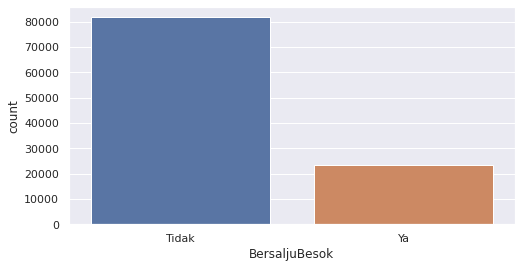

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='BersaljuBesok', data=train)
plt.show()

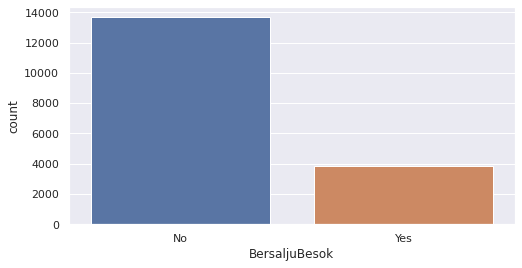

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='BersaljuBesok', data=test)
plt.show()

### Hubungan Arah Angin dan Label   

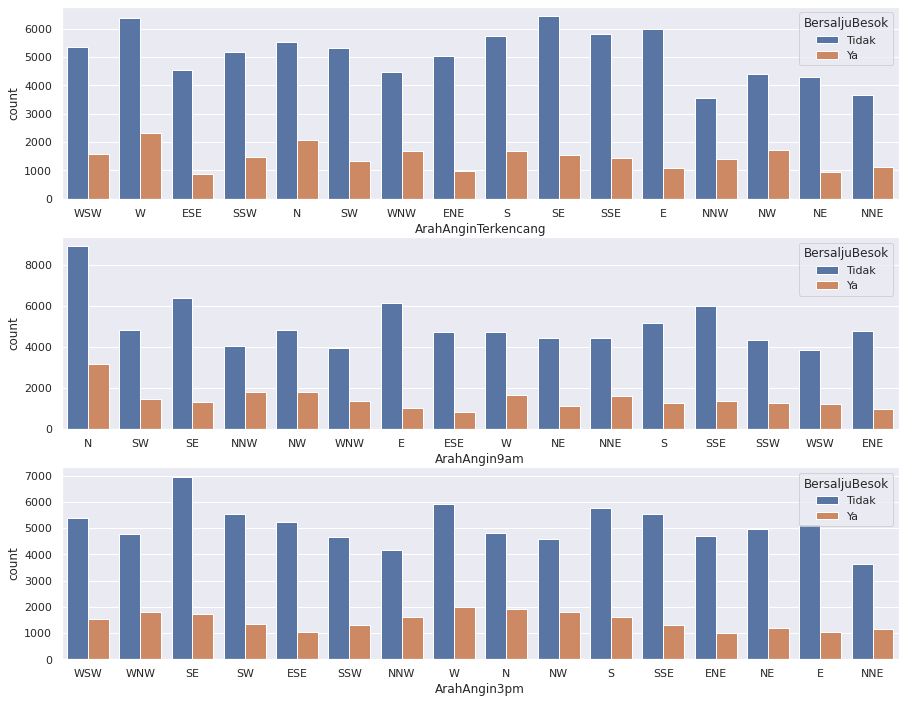

In [ ]:
angin = train[['ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm']]
fig, axes = plt.subplots(ncols=1, nrows=3)
for i, ax in zip(angin.columns, axes.flat):
    sns.countplot(x=angin[i], hue=train['BersaljuBesok'], ax=ax)
plt.show()

### Comparison between BersaljuHariIni and BersaljuBesok  

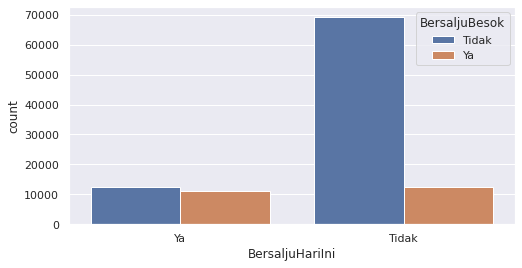

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=train['BersaljuHariIni'], hue=train['BersaljuBesok'])
plt.show()

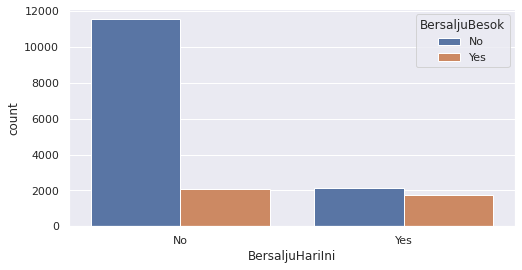

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=test['BersaljuHariIni'], hue=test['BersaljuBesok'])
plt.show()

### Correlation of [data feature-data feature] and [data feature-data label]

In [ ]:
cols = ['ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','BersaljuHariIni','BersaljuBesok']
train[cols] = train[cols].apply(LabelEncoder().fit_transform)

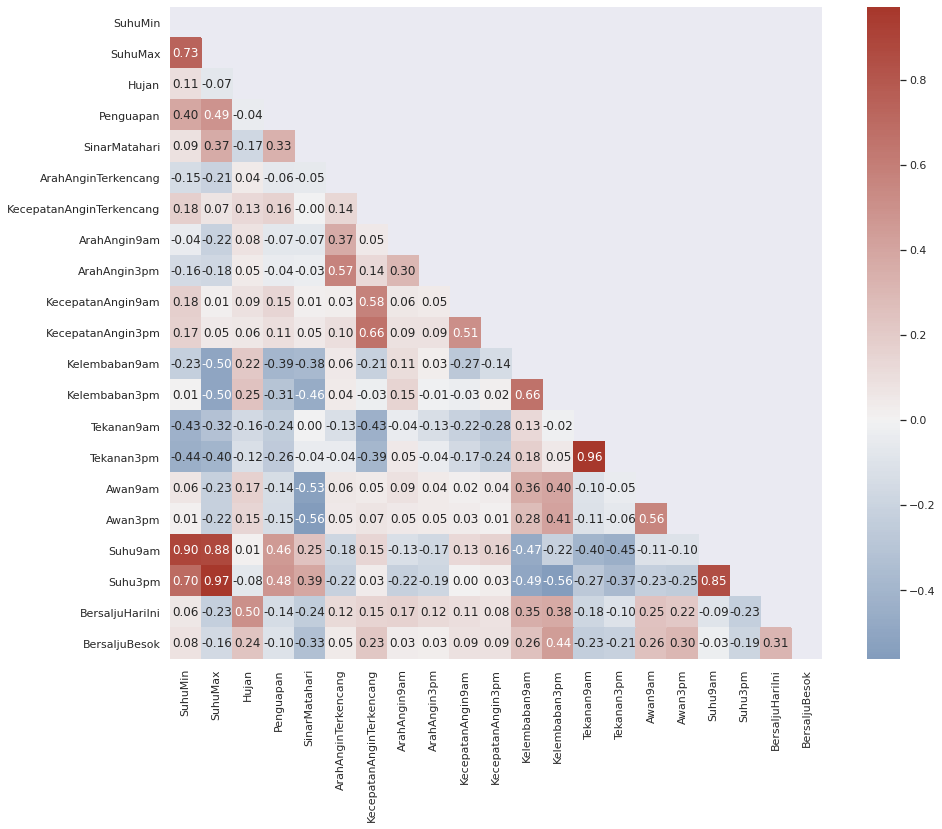

In [ ]:
# menampilkan korelasi
df_corr = train.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

### Feature Engineering

#### Choose features

In [ ]:
# Pilih kolom2 yang berpotensi dan drop sisanya

drop = ['Tanggal', 'KodeLokasi','Suhu3pm','Suhu9am','SuhuMax','KecepatanAngin3pm','KecepatanAngin9am','Kelembaban9am','Tekanan9am','ArahAnginTerkencang','ArahAngin3pm','ArahAngin9am','Awan9am']
df_train.drop(drop,axis=1,inplace=True)
df_test.drop(drop,axis=1,inplace=True)

In [ ]:
display(df_train.head())
display(df_test.head())

,SuhuMin,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,Kelembaban3pm,Tekanan3pm,Awan3pm,BersaljuHariIni,BersaljuBesok
0,10.4,4.8,8.596610,8.903448,24.000000,76.0,1018.500000,4.012579,Ya,Tidak
1,9.0,8.0,2.600000,7.400000,39.406037,61.0,1014.600000,5.000000,Ya,Ya
2,18.2,0.0,5.787784,7.802532,44.000000,42.0,1013.541479,4.715564,Tidak,Tidak
3,7.3,0.0,8.400000,10.400000,54.000000,17.0,1016.900000,7.000000,Tidak,Tidak
4,5.9,0.0,3.600000,12.600000,37.000000,48.0,1014.700000,6.000000,Tidak,Tidak


,SuhuMin,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,Kelembaban3pm,Tekanan3pm,Awan3pm,BersaljuHariIni,BersaljuBesok
0,11.0,0.0,4.615909,6.400000,46.0,56.0,1012.400000,7.000000,No,No
1,10.0,0.2,6.768182,7.958228,56.0,32.0,1015.200000,1.000000,No,Yes
2,9.2,0.0,5.200000,10.400000,33.0,27.0,1015.700000,1.000000,No,No
3,17.7,0.0,4.600000,6.700000,35.0,41.0,1008.600000,6.000000,No,No
4,2.3,88.0,4.087273,6.450000,46.0,95.0,1016.286029,4.324324,Yes,No


#### Label Encode data label "BersaljuBesok" and feature "BersaljuHariIni" 

In [ ]:
cols = ['BersaljuHariIni','BersaljuBesok']
df_train[cols] = df_train[cols].apply(LabelEncoder().fit_transform)
df_test[cols] = df_test[cols].apply(LabelEncoder().fit_transform)

In [ ]:
# df_train = pd.get_dummies(df_train, columns=['ArahAnginTerkencang'])
# df_test = pd.get_dummies(df_test, columns=['ArahAnginTerkencang'])

#### Scaling data 

In [ ]:
scale_train = StandardScaler().fit_transform(df_train)
scale_train = pd.DataFrame(scale_train, columns=df_train.columns)
scale_test = StandardScaler().fit_transform(df_test)
scale_test = pd.DataFrame(scale_test, columns=df_test.columns)

In [ ]:
scale_train.to_csv('train.csv', index=False)
scale_test.to_csv('test.csv', index=False)

### Separate features and label 

In [ ]:
X_train = scale_train.loc[ : , scale_train.columns != 'BersaljuBesok']
y_train = scale_train['BersaljuBesok']
X_test = scale_test.loc[ : , scale_test.columns != 'BersaljuBesok']
y_test = scale_test['BersaljuBesok']

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

### Modeling with KNN

In [ ]:
# Note :
# 0 = Tidak
# 1 = Ya

In [ ]:
import timeit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
start = timeit.default_timer() # catat waktu mulai

params = {     
    'n_neighbors' : np.arange(3,26,2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean','minkowski']
}

randomized = RandomizedSearchCV(KNeighborsClassifier(), params, n_iter=15, scoring="accuracy", n_jobs=-1, cv=7)
randomized.fit(X_train, y_train)
print("Model Score with KNN :",randomized.best_score_)
print("Best Parameter",randomized.best_params_)
y_pred_knn = randomized.predict(X_test)
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report\n", classification_report(y_test, y_pred_knn, labels=[0, 1]))

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

Model Score with KNN : 0.8449673860140955
Best Parameter {'weights': 'distance', 'n_neighbors': 25, 'metric': 'minkowski'}
Confusion Matrix
 [[12983   692]
 [ 1966  1888]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     13675
           1       0.73      0.49      0.59      3854

    accuracy                           0.85     17529
   macro avg       0.80      0.72      0.75     17529
weighted avg       0.84      0.85      0.84     17529

Lama eksekusi:  716.7450225840003 detik


In [ ]:
print("Test Set Score Accuracy :",accuracy_score(y_test, y_pred_knn))
print("Test Set Score f1 score:",f1_score(y_test, y_pred_knn, average="weighted"))

Test Set Score Accuracy : 0.848365565634092
Test Set Score f1 score: 0.8367274360006018


### Modeling with Decision Tree Classifier

In [ ]:
start = timeit.default_timer() # catat waktu mulai

params_dst = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : np.arange(1,10),
    'min_samples_split' : [2, 5, 10, 15, 100]
}

randomized_dst = RandomizedSearchCV(DecisionTreeClassifier(), params_dst, n_iter=100, scoring="accuracy", n_jobs=-1, cv=7)
randomized_dst.fit(X_train, y_train)
print("Model Score with Decision Tree Classifier :",randomized_dst.best_score_)
print("Best Parameter",randomized_dst.best_params_)
y_pred_dst = randomized_dst.predict(X_test)
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred_dst))
print("Classification Report :\n",classification_report(y_test, y_pred_dst, labels=[0, 1]))

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

Model Score with Decision Tree Classifier : 0.8419034508773121
Best Parameter {'splitter': 'best', 'min_samples_split': 5, 'max_depth': 8, 'criterion': 'gini'}
Confusion Matrix :
 [[12939   736]
 [ 2072  1782]]
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     13675
           1       0.71      0.46      0.56      3854

    accuracy                           0.84     17529
   macro avg       0.78      0.70      0.73     17529
weighted avg       0.83      0.84      0.83     17529

Lama eksekusi:  73.24622341500071 detik


In [ ]:
print("Test Set Score Accuracy :",accuracy_score(y_test, y_pred_dst))
print("Test Set Score f1 score:",f1_score(y_test, y_pred_dst, average="weighted"))

Test Set Score Accuracy : 0.8398083176450454
Test Set Score f1 score: 0.8267451622701014


### Modeling with Random Forest Classifier

In [ ]:
start = timeit.default_timer() # catat waktu mulai

params_rfc = {
    'n_estimators': [4, 6, 9], 
    'max_features': ['log2', 'sqrt','auto'], 
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10], 
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1,5,8]
}

randomized_rfc = RandomizedSearchCV(RandomForestClassifier(), params_rfc, n_iter=100, scoring="accuracy", n_jobs=-1, cv=7)
randomized_rfc.fit(X_train, y_train)
print("Model Score with Random Forest :",randomized_rfc.best_score_)
print("Best Parameter :",randomized_rfc.best_params_)
y_pred_rfc = randomized_rfc.predict(X_test)
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_rfc))
print("Classification Report :\n",classification_report(y_test, y_pred_rfc, labels=[0, 1]))

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik") 

Model Score with Random Forest : 0.8468038230689074
Best Parameter : {'n_estimators': 9, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
Confusion Matrix :
 [[13071   604]
 [ 2029  1825]]
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     13675
           1       0.75      0.47      0.58      3854

    accuracy                           0.85     17529
   macro avg       0.81      0.71      0.74     17529
weighted avg       0.84      0.85      0.84     17529

Lama eksekusi:  207.47270590699918 detik


In [ ]:
print("Test Set Score Accuracy :",accuracy_score(y_test, y_pred_rfc))
print("Test Set Score f1 score:",f1_score(y_test, y_pred_rfc, average="weighted"))

Test Set Score Accuracy : 0.8497917736322665
Test Set Score f1 score: 0.8364772917946908
